# Problems

## Problem 1: Data from yfinance

The first thing that is necessary is to import the packages we need. In this case, we'll start with yfinance and pandas as well as datetime.

In [2]:
# This imports datetime
from datetime import datetime

# This imports Panda
import pandas as pd

# This imports Matplotlib
import matplotlib.pyplot as plt

# This imports yfinance
import yfinance as yf

Afterwards, since this is an unnoficial package, let's test it out to make sure it's working. If we follow allong with the main documentation, we can see that yf.download will get us the data. If everything is working, we should have no issues getting the data. 

In [3]:
# As per the documentation, we create first the variable called tickers and use yf.Tickers.
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# With that variable set up, we can go ahead and just print data for 1 month. 
current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
print(current_data)

# References:
# https://ranaroussi.github.io/yfinance/

/tmp/ipykernel_1665/2821640980.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                   \
Ticker            AAPL        AMZN        GOOG        META         NFLX   
Date                                                                      
2025-10-13  247.420151  220.070007  244.639999  715.700012  1219.030029   
2025-10-14  247.530045  216.389999  246.190002  708.650024  1215.349976   
2025-10-15  249.098526  215.570007  251.710007  717.549988  1203.290039   
2025-10-16  247.210358  214.470001  251.880005  712.070007  1183.589966   
2025-10-17  252.045654  213.039993  253.789993  716.919983  1199.359985   
2025-10-20  261.986023  216.479996  257.019989  732.169983  1238.560059   
2025-10-21  262.515503  222.029999  251.339996  733.270020  1241.349976   
2025-10-22  258.199707  217.949997  252.529999  733.409973  1116.369995   
2025-10-23  259.328583  221.089996  253.729996  734.000000  1113.589966   
2025-10-24  262.565491  224.210007  260.510010  738.359985  1094.689941   
2025-10-27  268.549652  2

With everything properly tested, the next step is writing the function itself on these same companies.

In [4]:
def get_data():
    
    # By following the documentation and the format that we defined above, we can do the same thing here. 
    # The only problem I had was the hourly interval.
    # Luckily, I was able to find some information on this and the only thing that's needed is setting up a variable called "interval" 
    # with the desired interval.
    df = yf.download(
        ["META", "AAPL", "AMZN", "NFLX", "GOOG"],
        period="5d",
        interval="1h"
    )

    # We then use the datetime package to help us with the formatting. 
    # In this case, we can use strftime, which returns a string representing date and time using date, time or datetime object. 
    # In other words, we get use the datetime function and apply that 
    # format to look the way we want.
    time_format = datetime.now().strftime("%Y%m%d-%H%M%S")

    # We create a variable called data that contains the full path and name of the file we need to save. This snippet came from ChatGpt:
    data = f"data/{time_format}.csv"

    # Finally, we send it to the folder with the to_csv function.
    df.to_csv(data)

    return df

# If it all works out, we can run this and it will create our csv file. 

yfinance_data = get_data()

yfinance_data


# References
# https://algotrading101.com/learn/yfinance-guide/
# https://www.programiz.com/python-programming/datetime/strftime
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/
# ChatGpt - For the solution on data = f"data/{time_format}.csv":
'''
    ✅ Explanation
    - f"data/{timestamp}.csv" points directly to your folder.
    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.

    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.

    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? 
    Since I already have df.to_csv(filename), why do I need that?"

    You need:
    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.
    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().
'''

/tmp/ipykernel_1665/1423315783.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  5 of 5 completed


'\n    ✅ Explanation\n    - f"data/{timestamp}.csv" points directly to your folder.\n    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.\n\n    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.\n\n    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? \n    Since I already have df.to_csv(filename), why do I need that?"\n\n    You need:\n    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.\n    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().\n'

In [5]:
# Small test to see what the close column is
csv_path = "data/20251103-194125.csv"  # keep path in a separate variable
df = pd.read_csv(csv_path, header=[0, 1], index_col=0, parse_dates=True)  # yfinance default headers
df.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-10-28 13:30:00+00:00  268.649994  226.520004  268.019989  747.349976   
2025-10-28 14:30:00+00:00  268.697205  227.550003  268.000000  754.349976   
2025-10-28 15:30:00+00:00  268.994995  229.110001  267.739990  751.965027   
2025-10-28 16:30:00+00:00  269.494995  230.690002  268.772705  756.109985   
2025-10-28 17:30:00+00:00  269.090210  230.052399  268.831787  754.802979   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-10-28 13:30:00+00:00  1109.030151  269.869995  228.589996  271.380005   
2025-10-28 14:30:00+00:00  1103.260010  269.140015  227.880005  268.467194   
2025-10-28 15:30:00+00:00  1101.296143  269.075806  229.229996  268.160004   
2025-10-28 16:30:00+00:00  1103.755127  269.869995  230.789993  268.910492   
2025-10-28 17:30:00+00:00  1109.500000  269.494995  231.485001  269.059998   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-10-28 13:30:00+00:00  758.390015  1116.979858  ...  269.135010   
2025-10-28 14:30:00+00:00  754.700012  1109.195801  ...  268.642303   
2025-10-28 15:30:00+00:00  754.700012  1103.280029  ...  268.695007   
2025-10-28 16:30:00+00:00  756.210022  1105.619995  ...  268.980011   
2025-10-28 17:30:00+00:00  756.650024  1110.790039  ...  269.494995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-10-28 13:30:00+00:00  228.220001  269.989990  752.989990  1094.020020   
2025-10-28 14:30:00+00:00  226.529999  268.019989  747.340027  1109.030151   
2025-10-28 15:30:00+00:00  227.539993  267.990509  754.375000  1103.280029   
2025-10-28 16:30:00+00:00  229.110001  267.750000  752.070007  1101.290039   
2025-10-28 17:30:00+00:00  230.690002  268.752899  756.054993  1103.699951   

Price                        Volume                                       
Ticker                         AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                  
2025-10-28 13:30:00+00:00  11832766  10054295  5376066  3103414  1299551  
2025-10-28 14:30:00+00:00   3550384   4415312  2329834  1786041   427178  
2025-10-28 15:30:00+00:00   2758052   6774729  1805470  1290682   318734  
2025-10-28 16:30:00+00:00   3503864   6313749  2182660  1305274   368228  
2025-10-28 17:30:00+00:00   3181670   6155117  1509673   829164   391136  

[5 rows x 25 columns]

## Problem 2: Plotting Data

# RESEARCHING

In [7]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

<Axes: xlabel='Datetime'>

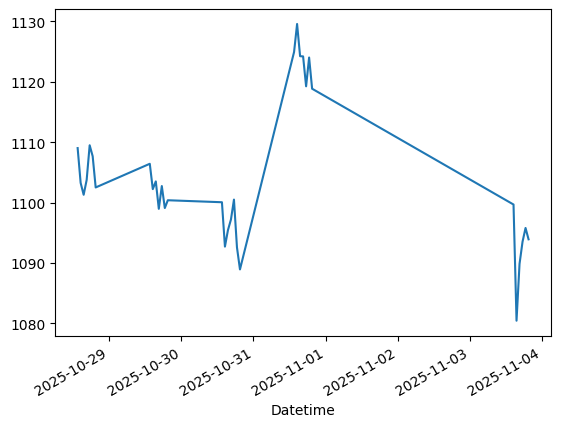

In [8]:
df[("Close", "NFLX")].plot()

<Axes: xlabel='Datetime'>

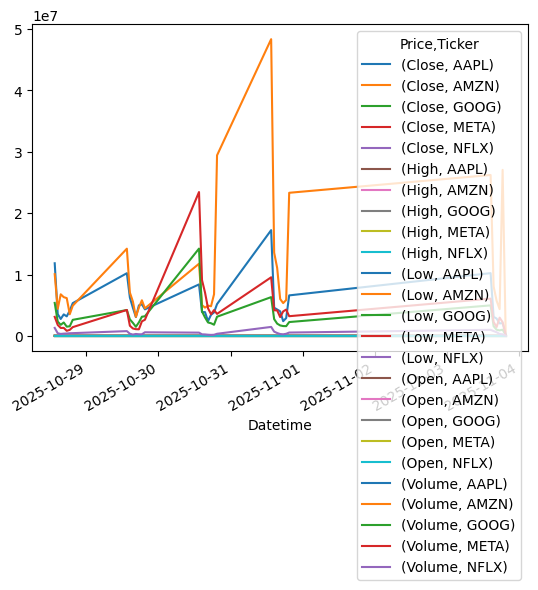

In [ ]:
# We start by creating our function

def plot_data()
    



# References:
# https://www.investopedia.com/articles/technical/112601.asp
# https://www.investopedia.com/terms/p/pennant.asp
# https://pandas.pydata.org/docs/user_guide/visualization.html    

## Problem 3: Script


For the following problem, I went ahead and copied the functions themselves (both from downloading data and making plots) and pasted them into a python file called faang.py.
These were copied as actual scripts instead of functions however, since we'll just the file as is.
>
Afterwards, I made sure I was able to excute the the script from the terminal command line through the following steps:
>
1. I created a new terminal in the current actice workspace.
2. Once the terminal was created, I made sure I was located in my root repository by using the __ls -l__ command and paying attention to the directory __(/workspaces/Computer_Infrastructure (main))__
3. After this, I checked if the python script was executable or not. It seems it only had read and write permissions as evidenced by the following: __-rw-rw-rw-__
4. I then used the command __chmod u+x faang.py__ to make sure that the file was executable
6. Finally, I made sure that the script contained a shebang line __(#! /usr/bin/env python)__ so the program knwos which interpreter should run the file when its executed.
5. I ran the file via the __./faang.py__ command to check if it was running fine.

## Problem 4: Automation
